Manipulation de données

In [1]:
import pandas as pd
dadd=pd.read_csv('nodes-addresses.csv', low_memory=False)
doff=pd.read_csv('nodes-officers.csv', low_memory=False)
dent=pd.read_csv('nodes-entities.csv', low_memory=False)
drel=pd.read_csv('relationships.csv', low_memory=False)

Exercice I avec Pandas

1.Combien de pays ont été déclarés dans les offshore leaks ? 

In [2]:
pays_uniques = dadd[dadd["sourceID"] == "Offshore Leaks"]["countries"].nunique()
print(f"Nombre de pays déclarés dans les offshore leaks est : {pays_uniques}")

Nombre de pays déclarés dans les offshore leaks est : 172


2.Dans combien d'entrée le mot "Ireland" est présent ?

In [3]:
def contientIreland(ligne):
    return ligne.str.contains('Ireland').any()

NbEntréeIreland = dadd.apply(contientIreland, axis=1).sum()
print(f"Le mot 'Ireland' est présent dans {NbEntréeIreland} entrées")

Le mot 'Ireland' est présent dans 981 entrées


3.Dans combien de montage apparrait "EL PORTADOR" ?

In [4]:
def contientElPortador(ligne):
    return ligne.str.contains('EL PORTADOR').any()

NbMontageElPortador = doff.apply(contientElPortador, axis=1).sum()
print(f"'EL PORTADOR' apparait dans {NbMontageElPortador} montages")

'EL PORTADOR' apparait dans 9325 montages


Utilisation de Seaborn

In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt

Exercice II avec Seaborn

4. Faites un histogramme des pays qui ont été déclarés dans les offshore leaks

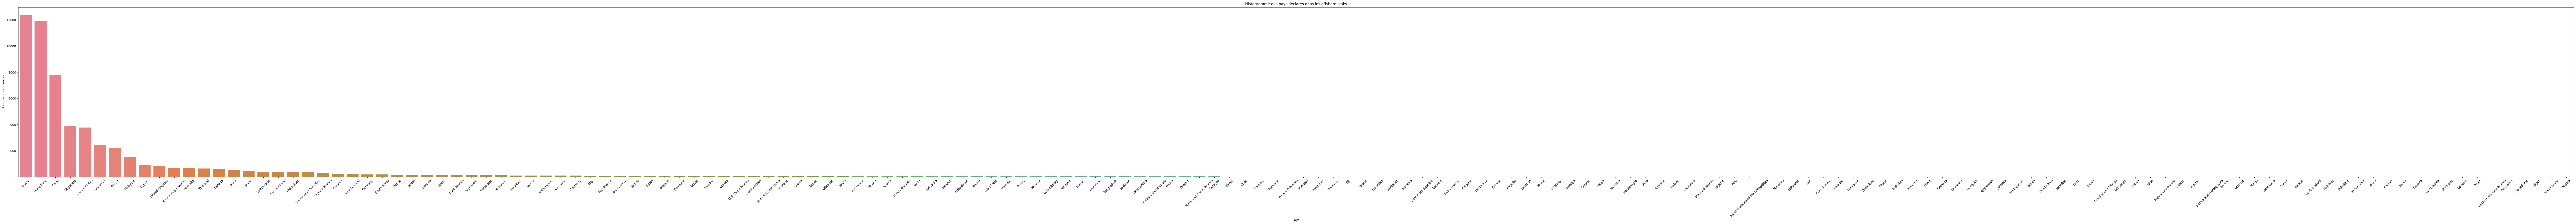

In [6]:
country_counts = dadd[dadd["sourceID"] == "Offshore Leaks"]["countries"].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']


plt.figure(figsize=(150, 10))
sns.barplot(x='Country', y='Count',hue='Country', data=country_counts, legend=False)

plt.title('Histogramme des pays déclarés dans les offshore leaks')
plt.xlabel('Pays')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45) 
plt.show()

5. Est on en présence d'une loi normale si non quel est le top 20 des pays les plus déclarés ?

Nous ne somme pas en présence d'une normale car la courbe ne suis pas la forme d'une cloche. De plus, d'après le calcul ci-dessous, p-valeur > 0.05.

In [7]:
from scipy import stats

# Générer des données normalement distribuées pour l'exemple
data = stats.norm.rvs(size=1000)

# Test de Shapiro-Wilk
shapiro_test = stats.shapiro(data)

print(f"Statistique de test: {shapiro_test[0]}, p-valeur: {shapiro_test[1]}")

Statistique de test: 0.9983358974503368, p-valeur: 0.4523520788588303


In [8]:
print(country_counts.head(20))

                   Country  Count
0                   Taiwan  12361
1                Hong Kong  11894
2                    China   7806
3                Singapore   3909
4            United States   3766
5                Indonesia   2400
6                   Russia   2188
7                 Malaysia   1506
8                   Cyprus    896
9           United Kingdom    843
10  British Virgin Islands    658
11               Australia    653
12                Thailand    634
13                  Canada    624
14                   India    514
15                   Japan    467
16             Switzerland    380
17          Not identified    356
18             Philippines    355
19    United Arab Emirates    354


Reconstruction de la base de données

Exercice III

6. Combien de service providers ont été déclarés dans les offshore leaks et quelle est la proportion de ces service providers vis-à-vis de des officers ?

In [9]:
officer_of_relation = drel[drel['_type'] == 'officer_of']  

merged_data = pd.merge(officer_of_relation, doff, left_on='_start', right_on='node_id')
merged_data = pd.merge(merged_data, dent, left_on='_end', right_on='node_id')

unique_service_providers = dent[dent["sourceID"]=="Offshore Leaks"]['service_provider'].nunique()

total_officers = doff.shape[0]

proportion = unique_service_providers / total_officers 

print(f"Nombre de service providers uniques : {unique_service_providers}")
print(f"Nombre total d'officers : {total_officers}")
print(f"Proportion de service providers par rapport aux officers : {proportion}")

Nombre de service providers uniques : 2
Nombre total d'officers : 746949
Proportion de service providers par rapport aux officers : 2.677558976583408e-06
